In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('attribution_data.csv')
df.size

3520422

In [3]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [4]:
df.dtypes

cookie               object
time                 object
interaction          object
conversion            int64
conversion_value    float64
channel              object
dtype: object

In [5]:
df_filterd_convert = df[df['conversion'] == 1]
df_filterd_convert.head()

,cookie,time,interaction,conversion,conversion_value,channel
22,0007oEBhnoF97AoEE3BCkFnhB,2018-07-06T13:45:29Z,conversion,1,6.5,Paid Search
23,00090n9EBBEkA000C7Cik999D,2018-07-05T06:53:53Z,conversion,1,8.0,Facebook
83,000h3n9nC0hFhE3CCnkkAof7n,2018-07-19T14:31:57Z,conversion,1,6.0,Facebook
109,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-25T11:15:16Z,conversion,1,6.5,Online Video
124,000kiDB3D0fCfDAohCDB3ohko,2018-07-26T16:16:21Z,conversion,1,7.5,Facebook


In [9]:
cookie_index = list(df_filterd_convert["cookie"])

In [12]:
grouped_df = pd.DataFrame(df.groupby("cookie").first())
filter_df = grouped_df.loc[cookie_index]
filter_df.head()

,time,interaction,conversion,conversion_value,channel
cookie,,,,,
0007oEBhnoF97AoEE3BCkFnhB,2018-07-06T13:45:29Z,conversion,1,6.5,Paid Search
00090n9EBBEkA000C7Cik999D,2018-07-05T06:53:53Z,conversion,1,8.0,Facebook
000h3n9nC0hFhE3CCnkkAof7n,2018-07-19T14:31:57Z,conversion,1,6.0,Facebook
000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07T14:34:54Z,impression,0,0.0,Online Video
000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07T14:34:54Z,impression,0,0.0,Online Video


In [13]:
first_touch = pd.DataFrame(round(filter_df["channel"].value_counts(normalize=True) * 100, 2))
first_touch.columns = ["Weight (%)"]
first_touch

,Weight (%)
channel,
Facebook,32.59
Online Video,25.20
Paid Search,18.47
Instagram,14.78
Online Display,8.95


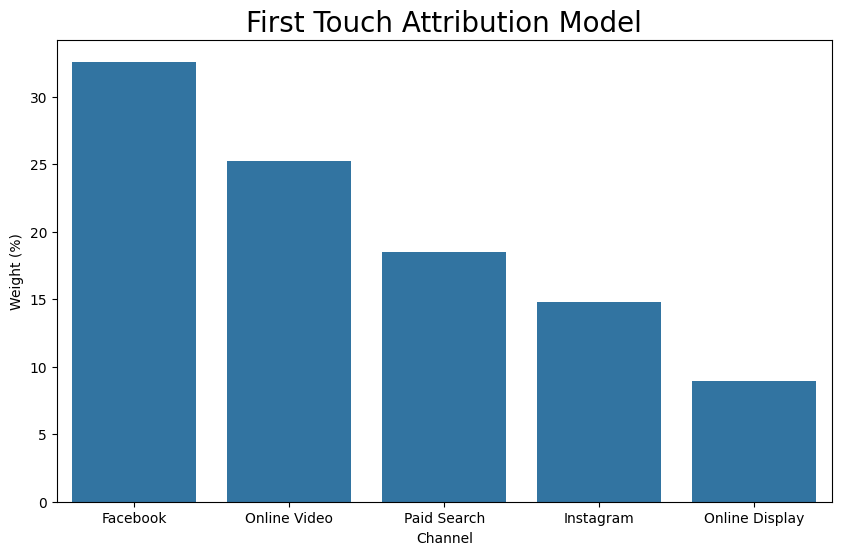

In [18]:
plt.subplots(figsize=(10, 6))
sns.barplot(data=first_touch, x=first_touch.index, y="Weight (%)")
plt.xlabel("Channel")
plt.title("First Touch Attribution Model", fontsize=20)
plt.savefig('plot/first_touch.png')